<a href="https://colab.research.google.com/github/dimi-fn/Emotion-Recognition-in-Movie-Abstracts/blob/master/2_NLP_movies_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# importing libraries for data analysis and manipulation
import pandas as pd
import numpy as np

np.random.seed(42) # to make this notebook's output stable across runs

# For plotting figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Generating the version of a wide variety of packages/libraries used & working environment
#pd.__version__
#pd.show_versions(as_json=False)

In [2]:
# Code to read csv file into colaboratory:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [3]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Reading the "movies_final.csv" file

In [4]:
downloaded = drive.CreateFile({'id':'1OlZ1WgeMZh8-qo2M6AFrVhaV83zxWjub'}) 
downloaded.GetContentFile('movies_final.csv') 

movies_final = pd.read_csv('movies_final.csv') 
movies_final.shape

(55877, 5)

In [5]:
movies_final.head(2)

,movieId,tmdbId,title,genres,overview
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ..."
1,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,When siblings Judy and Peter discover an encha...


In [6]:
movies_final.tail(2)

,movieId,tmdbId,title,genres,overview
55875,209163,553036.0,Bad Poems (2018),Comedy|Drama,"33-years old Tamás Merthner is heartbroken, af..."
55876,209171,79513.0,Women of Devil's Island (1962),Action|Adventure|Drama,Italian costume drama about convicted women in...


# SpaCy Environment

Download SpaCy

> Open-source software library for advanced natural language processing

In [7]:
# Download Spacy library open source
!python -m spacy download en

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/en_core_web_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/en
You can now load the model via spacy.load('en')


In [8]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [9]:
import spacy
# load the large spacy library
nlp = spacy.load("en_core_web_lg") 

# Regular Expressions



In [10]:
import re 

In [11]:
# displaying the 1st movie overview

movie_first= movies_final["overview"][0]
print(movie_first)

Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.


In [12]:
# Displaying the text as a script which is more readable (not like above)
from IPython.display import Markdown, display
display(Markdown('> '+movie_first))

> Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.

In [13]:
pattern= "Buzz"
text= movie_first
my_match= re.search(pattern, text)
print (pattern in text)
print (len(re.findall(pattern, text))) #how many times my pattern occurs

True
3


# Tokenization & POS

https://spacy.io/api/annotation#pos-tagging

## Coarse-grained Part-of-speech Tags
Every token is assigned a POS Tag from the following list:


<table><tr><th>POS</th><th>DESCRIPTION</th><th>EXAMPLES</th></tr>
    
<tr><td>ADJ</td><td>adjective</td><td>*big, old, green, incomprehensible, first*</td></tr>
<tr><td>ADP</td><td>adposition</td><td>*in, to, during*</td></tr>
<tr><td>ADV</td><td>adverb</td><td>*very, tomorrow, down, where, there*</td></tr>
<tr><td>AUX</td><td>auxiliary</td><td>*is, has (done), will (do), should (do)*</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>*and, or, but*</td></tr>
<tr><td>CCONJ</td><td>coordinating conjunction</td><td>*and, or, but*</td></tr>
<tr><td>DET</td><td>determiner</td><td>*a, an, the*</td></tr>
<tr><td>INTJ</td><td>interjection</td><td>*psst, ouch, bravo, hello*</td></tr>
<tr><td>NOUN</td><td>noun</td><td>*girl, cat, tree, air, beauty*</td></tr>
<tr><td>NUM</td><td>numeral</td><td>*1, 2017, one, seventy-seven, IV, MMXIV*</td></tr>
<tr><td>PART</td><td>particle</td><td>*'s, not,*</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>*I, you, he, she, myself, themselves, somebody*</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>*Mary, John, London, NATO, HBO*</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>*., (, ), ?*</td></tr>
<tr><td>SCONJ</td><td>subordinating conjunction</td><td>*if, while, that*</td></tr>
<tr><td>SYM</td><td>symbol</td><td>*$, %, §, ©, +, −, ×, ÷, =, :), 😝*</td></tr>
<tr><td>VERB</td><td>verb</td><td>*run, runs, running, eat, ate, eating*</td></tr>
<tr><td>X</td><td>other</td><td>*sfpksdpsxmsa*</td></tr>
<tr><td>SPACE</td><td>space</td></tr>

___
## Fine-grained Part-of-speech Tags (more details of POS)
Tokens are subsequently given a fine-grained tag as determined by morphology:
<table>
<tr><th>POS</th><th>Description</th><th>Fine-grained Tag</th><th>Description</th><th>Morphology</th></tr>
<tr><td>ADJ</td><td>adjective</td><td>AFX</td><td>affix</td><td>Hyph=yes</td></tr>
<tr><td>ADJ</td><td></td><td>JJ</td><td>adjective</td><td>Degree=pos</td></tr>
<tr><td>ADJ</td><td></td><td>JJR</td><td>adjective, comparative</td><td>Degree=comp</td></tr>
<tr><td>ADJ</td><td></td><td>JJS</td><td>adjective, superlative</td><td>Degree=sup</td></tr>
<tr><td>ADJ</td><td></td><td>PDT</td><td>predeterminer</td><td>AdjType=pdt PronType=prn</td></tr>
<tr><td>ADJ</td><td></td><td>PRP\$</td><td>pronoun, possessive</td><td>PronType=prs Poss=yes</td></tr>
<tr><td>ADJ</td><td></td><td>WDT</td><td>wh-determiner</td><td>PronType=int rel</td></tr>
<tr><td>ADJ</td><td></td><td>WP\$</td><td>wh-pronoun, possessive</td><td>Poss=yes PronType=int rel</td></tr>
<tr><td>ADP</td><td>adposition</td><td>IN</td><td>conjunction, subordinating or preposition</td><td></td></tr>
<tr><td>ADV</td><td>adverb</td><td>EX</td><td>existential there</td><td>AdvType=ex</td></tr>
<tr><td>ADV</td><td></td><td>RB</td><td>adverb</td><td>Degree=pos</td></tr>
<tr><td>ADV</td><td></td><td>RBR</td><td>adverb, comparative</td><td>Degree=comp</td></tr>
<tr><td>ADV</td><td></td><td>RBS</td><td>adverb, superlative</td><td>Degree=sup</td></tr>
<tr><td>ADV</td><td></td><td>WRB</td><td>wh-adverb</td><td>PronType=int rel</td></tr>
<tr><td>CONJ</td><td>conjunction</td><td>CC</td><td>conjunction, coordinating</td><td>ConjType=coor</td></tr>
<tr><td>DET</td><td>determiner</td><td>DT</td><td>determiner</td><td></td></tr>
<tr><td>INTJ</td><td>interjection</td><td>UH</td><td>interjection</td><td></td></tr>
<tr><td>NOUN</td><td>noun</td><td>NN</td><td>noun, singular or mass</td><td>Number=sing</td></tr>
<tr><td>NOUN</td><td></td><td>NNS</td><td>noun, plural</td><td>Number=plur</td></tr>
<tr><td>NOUN</td><td></td><td>WP</td><td>wh-pronoun, personal</td><td>PronType=int rel</td></tr>
<tr><td>NUM</td><td>numeral</td><td>CD</td><td>cardinal number</td><td>NumType=card</td></tr>
<tr><td>PART</td><td>particle</td><td>POS</td><td>possessive ending</td><td>Poss=yes</td></tr>
<tr><td>PART</td><td></td><td>RP</td><td>adverb, particle</td><td></td></tr>
<tr><td>PART</td><td></td><td>TO</td><td>infinitival to</td><td>PartType=inf VerbForm=inf</td></tr>
<tr><td>PRON</td><td>pronoun</td><td>PRP</td><td>pronoun, personal</td><td>PronType=prs</td></tr>
<tr><td>PROPN</td><td>proper noun</td><td>NNP</td><td>noun, proper singular</td><td>NounType=prop Number=sign</td></tr>
<tr><td>PROPN</td><td></td><td>NNPS</td><td>noun, proper plural</td><td>NounType=prop Number=plur</td></tr>
<tr><td>PUNCT</td><td>punctuation</td><td>-LRB-</td><td>left round bracket</td><td>PunctType=brck PunctSide=ini</td></tr>
<tr><td>PUNCT</td><td></td><td>-RRB-</td><td>right round bracket</td><td>PunctType=brck PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>,</td><td>punctuation mark, comma</td><td>PunctType=comm</td></tr>
<tr><td>PUNCT</td><td></td><td>:</td><td>punctuation mark, colon or ellipsis</td><td></td></tr>
<tr><td>PUNCT</td><td></td><td>.</td><td>punctuation mark, sentence closer</td><td>PunctType=peri</td></tr>
<tr><td>PUNCT</td><td></td><td>''</td><td>closing quotation mark</td><td>PunctType=quot PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>""</td><td>closing quotation mark</td><td>PunctType=quot PunctSide=fin</td></tr>
<tr><td>PUNCT</td><td></td><td>``</td><td>opening quotation mark</td><td>PunctType=quot PunctSide=ini</td></tr>
<tr><td>PUNCT</td><td></td><td>HYPH</td><td>punctuation mark, hyphen</td><td>PunctType=dash</td></tr>
<tr><td>PUNCT</td><td></td><td>LS</td><td>list item marker</td><td>NumType=ord</td></tr>
<tr><td>PUNCT</td><td></td><td>NFP</td><td>superfluous punctuation</td><td></td></tr>
<tr><td>SYM</td><td>symbol</td><td>#</td><td>symbol, number sign</td><td>SymType=numbersign</td></tr>
<tr><td>SYM</td><td></td><td>\$</td><td>symbol, currency</td><td>SymType=currency</td></tr>
<tr><td>SYM</td><td></td><td>SYM</td><td>symbol</td><td></td></tr>
<tr><td>VERB</td><td>verb</td><td>BES</td><td>auxiliary "be"</td><td></td></tr>
<tr><td>VERB</td><td></td><td>HVS</td><td>forms of "have"</td><td></td></tr>
<tr><td>VERB</td><td></td><td>MD</td><td>verb, modal auxiliary</td><td>VerbType=mod</td></tr>
<tr><td>VERB</td><td></td><td>VB</td><td>verb, base form</td><td>VerbForm=inf</td></tr>
<tr><td>VERB</td><td></td><td>VBD</td><td>verb, past tense</td><td>VerbForm=fin Tense=past</td></tr>
<tr><td>VERB</td><td></td><td>VBG</td><td>verb, gerund or present participle</td><td>VerbForm=part Tense=pres Aspect=prog</td></tr>
<tr><td>VERB</td><td></td><td>VBN</td><td>verb, past participle</td><td>VerbForm=part Tense=past Aspect=perf</td></tr>
<tr><td>VERB</td><td></td><td>VBP</td><td>verb, non-3rd person singular present</td><td>VerbForm=fin Tense=pres</td></tr>
<tr><td>VERB</td><td></td><td>VBZ</td><td>verb, 3rd person singular present</td><td>VerbForm=fin Tense=pres Number=sing Person=3</td></tr>
<tr><td>X</td><td>other</td><td>ADD</td><td>email</td><td></td></tr>
<tr><td>X</td><td></td><td>FW</td><td>foreign word</td><td>Foreign=yes</td></tr>
<tr><td>X</td><td></td><td>GW</td><td>additional word in multi-word expression</td><td></td></tr>
<tr><td>X</td><td></td><td>XX</td><td>unknown</td><td></td></tr>
<tr><td>SPACE</td><td>space</td><td>_SP</td><td>space</td><td></td></tr>
<tr><td></td><td></td><td>NIL</td><td>missing tag</td><td></td></tr>
</table>

> Taking as an example the 1st movie overview

In [14]:
# token.text => tokens
# token.pos_ => coarse POS
# token.tag_ => part-of-speech tag
# toke.dep_ => fine grained tag (dependency level)
# token.lemma_ => lemmatization
# spacy.explain(token.tag_) => token description
# spacy.explain(token.dep_) => fine grained tag description

document= nlp(movies_final["overview"][0])

for token in document:
  print(f'{token.text:{20}} {token.pos_:{20}} {token.tag_:{20}} {token.dep_:{20}} {token.lemma_:{20}} {spacy.explain(token.tag_):{50}} {spacy.explain(token.dep_)}')

Led                  VERB                 VBN                  advcl                lead                 verb, past participle                              adverbial clause modifier
by                   ADP                  IN                   agent                by                   conjunction, subordinating or preposition          agent
Woody                PROPN                NNP                  pobj                 Woody                noun, proper singular                              object of preposition
,                    PUNCT                ,                    punct                ,                    punctuation mark, comma                            punctuation
Andy                 PROPN                NNP                  poss                 Andy                 noun, proper singular                              possession modifier
's                   PART                 POS                  case                 's                   possessive ending            

In [15]:
# number of tokens in the first movie review
print (len(document))

59


### Visualizing POS


Using the library `displacy` we can visualise the `dependency parse` and display the `dependency graphic`

In [16]:
movie_first=nlp(movie_first)
for sentence in movie_first.sents:
  print(sentence)

Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene.
Afraid of losing his place in Andy's heart, Woody plots against Buzz.
But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.


> The dependency parse shows the coarse POS tag for each token, as well as the **dependency tag** if given:

In [17]:
from spacy import displacy
displacy.render(movie_first, style='dep', jupyter=True, options={'distance': 70})

# Sentiment Analysis

or `opinion mining` => identifying intended meaning from complex phrases.



> Polarity Classification:
>> if the text expresses a `positive, negative or neutral` opinion/statement
>> determine if a sentence is `objective or subjective` (and degree of positivity/negativity through a fine-grained analysis)



## NLTK's VADER module | Valence Aware Dictionary for sEntiment Reasoning


>  https://www.nltk.org/_modules/nltk/sentiment/vader.html


VADER's `SentimentIntensityAnalyzer()` takes in a string and returns a dictionary of scores in each of four categories:
* negative [0,1]
* neutral  [0,1]
* positive [0,1]
* compound *(computed by normalizing the scores above)* [-1,1]

In [18]:
# https://www.nltk.org/_modules/nltk/sentiment/vader.html

In [19]:
import nltk
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to /root/nltk_data...


True

In [20]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

sid = SentimentIntensityAnalyzer()

/usr/local/lib/python3.6/dist-packages/nltk/twitter/__init__.py:20: UserWarning: The twython library has not been installed. Some functionality from the twitter package will not be available.
  warnings.warn("The twython library has not been installed. "


In [21]:
!pip3 install -U nltk[twitter]

     |████████████████████████████████| 1.4MB 2.8MB/s 
  Created wheel for nltk: filename=nltk-3.5-cp36-none-any.whl size=1434673 sha256=7af9676f86c7124d9db20c5bb289580f17b7b08021ab4d9c217bbd1b97a41821
  Stored in directory: /root/.cache/pip/wheels/ae/8c/3f/b1fe0ba04555b08b57ab52ab7f86023639a526d8bc8d384306
Successfully built nltk
  Found existing installation: nltk 3.2.5
    Uninstalling nltk-3.2.5:
      Successfully uninstalled nltk-3.2.5


In [22]:
# example of how VADER works
a = 'This was a good movie.'
sid.polarity_scores(a)

{'compound': 0.4404, 'neg': 0.0, 'neu': 0.508, 'pos': 0.492}

In [23]:
b = 'This was the worst film to ever disgrace the screen.'
sid.polarity_scores(b)

{'compound': -0.8074, 'neg': 0.477, 'neu': 0.523, 'pos': 0.0}

In [24]:
# Identifying the polarity for the 1st movie overview
sid.polarity_scores(movies_final["overview"][0])

{'compound': 0.25, 'neg': 0.048, 'neu': 0.886, 'pos': 0.066}

In [25]:
movies_final.isnull().sum()

movieId     0
tmdbId      0
title       0
genres      0
overview    0
dtype: int64

### Compound Scores & Polarity

Introducing a new column for reflecting the compound polarity scores (i.e. positive, negative, neutral, compound score)

In [26]:
movies_final["Vader_score"] = movies_final["overview"].apply(lambda overview: sid.polarity_scores(overview))
movies_final.head()

,movieId,tmdbId,title,genres,overview,Vader_score
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co..."
1,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,When siblings Judy and Peter discover an encha...,"{'neg': 0.161, 'neu': 0.702, 'pos': 0.137, 'co..."
2,3,15602.0,Grumpier Old Men (1995),Comedy|Romance,A family wedding reignites the ancient feud be...,"{'neg': 0.168, 'neu': 0.791, 'pos': 0.041, 'co..."
3,4,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,"Cheated on, mistreated and stepped on, the wom...","{'neg': 0.06, 'neu': 0.673, 'pos': 0.267, 'com..."
4,5,11862.0,Father of the Bride Part II (1995),Comedy,Just when George Banks has recovered from his ...,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp..."


> Compound score can give significant insights, hence below adding it in a separate column

In [27]:
movies_final["Vader_compound"]= movies_final["Vader_score"].apply(lambda score_dict: score_dict["compound"])
movies_final.head()

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.2500
1,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,When siblings Judy and Peter discover an encha...,"{'neg': 0.161, 'neu': 0.702, 'pos': 0.137, 'co...",-0.4588
2,3,15602.0,Grumpier Old Men (1995),Comedy|Romance,A family wedding reignites the ancient feud be...,"{'neg': 0.168, 'neu': 0.791, 'pos': 0.041, 'co...",-0.7645
3,4,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,"Cheated on, mistreated and stepped on, the wom...","{'neg': 0.06, 'neu': 0.673, 'pos': 0.267, 'com...",0.8860
4,5,11862.0,Father of the Bride Part II (1995),Comedy,Just when George Banks has recovered from his ...,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.5023


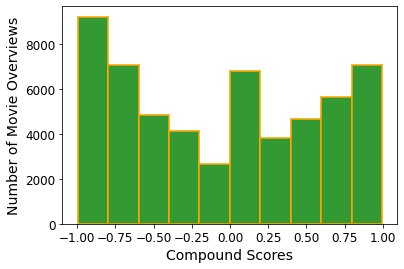

In [28]:
plt.xlabel("Compound Scores")
plt.ylabel("Number of Movie Overviews")
n,bins,patch = plt.hist(movies_final.Vader_compound,bins=10, color='green', alpha=0.8, label='Value', edgecolor='orange', linewidth=2)

Text(0, 0.5, 'Number of Movie Overviews')

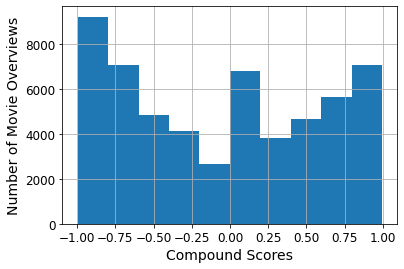

In [29]:
movies_final.Vader_compound.hist()
plt.xlabel("Compound Scores")
plt.ylabel("Number of Movie Overviews")

In [30]:
movies_final.head(1)

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.25


> Introducing a new column based on the magnitude of VADER's compound score: 

In [31]:
movies_final["Vader_polarity"]=movies_final["Vader_compound"].apply(
    lambda score: "positive" if score>0 else("neutral" if score==00 else "negative")
    )
movies_final.head()

#converter = lambda x : x*2 if x < 11 else (x*3 if x < 22 else x)

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.2500,positive
1,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,When siblings Judy and Peter discover an encha...,"{'neg': 0.161, 'neu': 0.702, 'pos': 0.137, 'co...",-0.4588,negative
2,3,15602.0,Grumpier Old Men (1995),Comedy|Romance,A family wedding reignites the ancient feud be...,"{'neg': 0.168, 'neu': 0.791, 'pos': 0.041, 'co...",-0.7645,negative
3,4,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,"Cheated on, mistreated and stepped on, the wom...","{'neg': 0.06, 'neu': 0.673, 'pos': 0.267, 'com...",0.8860,positive
4,5,11862.0,Father of the Bride Part II (1995),Comedy,Just when George Banks has recovered from his ...,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.5023,positive


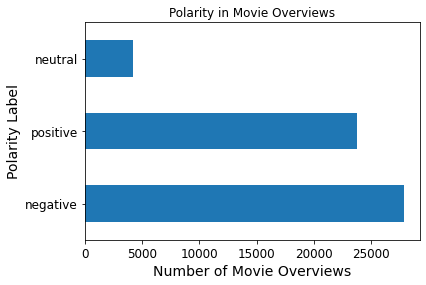

In [32]:
movies_final["Vader_polarity"].value_counts().sort_values(ascending=False).plot.barh()
plt.ylabel("Polarity Label")
plt.xlabel("Number of Movie Overviews")
plt.title("Polarity in Movie Overviews")
plt.show()

In [33]:
# general function for movies overview polarity classification

'''
def overview_rating(string):
    scores = sid.polarity_scores(string)
    if scores['compound'] == 0:
        return 'Neutral'
    elif scores['compound'] > 0:
        return 'Positive'
    else:
        return 'Negative'
'''

"\ndef overview_rating(string):\n    scores = sid.polarity_scores(string)\n    if scores['compound'] == 0:\n        return 'Neutral'\n    elif scores['compound'] > 0:\n        return 'Positive'\n    else:\n        return 'Negative'\n"

## Polarity with Transformers

In [34]:
#pip install transformers

In [35]:
'''
from transformers import pipeline
# Allocate a pipeline for sentiment-analysis
nlp = pipeline('sentiment-analysis')

'''

"\nfrom transformers import pipeline\n# Allocate a pipeline for sentiment-analysis\nnlp = pipeline('sentiment-analysis')\n\n"

In [36]:
'''
# 1st movie overview

nlp(movies_final["overview"][0])
'''

'\n# 1st movie overview\n\nnlp(movies_final["overview"][0])\n'

# Topic Modelling



## Non-Negative Matrix Factorization


> Preprocessing

In [37]:
from sklearn.feature_extraction.text import TfidfVectorizer

# max_df -> [0,1] ignoring words with high document frequency, the higher the number the more you ignore
# it will discard words which appear in 95% of documents

# min_df-> [0,1] or int number => number of documents, minimun document frequency 
# here min_df=2 => words much appear at least in 2 documents

# it will remove stopwods

tfidf = TfidfVectorizer(max_df=0.95, min_df=2, stop_words='english')

document_term_matrix = tfidf.fit_transform(movies_final['overview'])
document_term_matrix

<55877x40140 sparse matrix of type '<class 'numpy.float64'>'
	with 1414839 stored elements in Compressed Sparse Row format>

> This means that each moview overview is assigned with 40,140 terms each

> NMF

In [38]:
from sklearn.decomposition import NMF

nmf_model = NMF(n_components=7,random_state=42) # 7 topics
nmf_model.fit(document_term_matrix)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=42, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

> Displaying the top 15 most common words for each of the 7 topics:

In [39]:
for index,topic in enumerate(nmf_model.components_):
    print(f'The top 15 words per topic #{index}')
    # the values with the highest coefficients
    # (using LDA would give the highest probabilities)
    print([tfidf.get_feature_names()[index] for index in topic.argsort()[-15:]])
    print('\n')

The top 15 words per topic #0
['finds', 'people', 'gang', 'gets', 'soon', 'killer', 'friends', 'help', 'murder', 'group', 'time', 'wife', 'police', 'small', 'town']


The top 15 words per topic #1
['mysterious', 'relationship', 'affair', 'tries', 'couple', 'meets', 'girl', 'married', 'beautiful', 'finds', 'wife', 'husband', 'woman', 'man', 'young']


The top 15 words per topic #2
['set', 'comedy', 'music', 'feature', 'follows', 'true', 'short', 'directed', 'tells', 'director', 'movie', 'based', 'documentary', 'story', 'film']


The top 15 words per topic #3
['dreams', 'lives', 'different', 'married', 'beautiful', 'relationship', 'true', 'day', 'meets', 'fall', 'girl', 'story', 'falls', 'life', 'love']


The top 15 words per topic #4
['best', 'year', 'class', 'girl', 'college', 'girls', 'friends', 'student', 'students', 'teacher', 'city', 'high', 'york', 'school', 'new']


The top 15 words per topic #5
['mission', 'set', 'british', 'japanese', 'nazi', 'soldier', 'battle', 'civil', 'sold

> Attaching the discovered topic labels to movie overviews

In [40]:
document_term_matrix.shape

(55877, 40140)

In [41]:
topic_results = nmf_model.transform(document_term_matrix)
topic_results
# NMF coefficients

array([[0.0068153 , 0.0003204 , 0.00162828, ..., 0.00174242, 0.00015422,
        0.00250865],
       [0.01447984, 0.        , 0.00050033, ..., 0.00100479, 0.01887348,
        0.00368806],
       [0.01175528, 0.        , 0.00056066, ..., 0.        , 0.        ,
        0.01533097],
       ...,
       [0.00158035, 0.        , 0.00553808, ..., 0.00035745, 0.01943985,
        0.        ],
       [0.00939599, 0.00059352, 0.00084516, ..., 0.00156809, 0.        ,
        0.01269326],
       [0.01645967, 0.        , 0.00132349, ..., 0.01654899, 0.00425243,
        0.        ]])

In [42]:
topic_results[0] # coefficients of the 1st movie overview

array([0.0068153 , 0.0003204 , 0.00162828, 0.00256428, 0.00174242,
       0.00015422, 0.00250865])

In [43]:
topic_results[0].argmax()

#This means that our model thinks that the first overview belongs to topic #0 (topic 1 of totally 7)

0

> Displaying the NMF generated topics to dataframe

In [44]:
#  we are interested in the highest coefficients (in LDA-> probabilities)
# and we want the index position with the most representative target/topic
# ==> argmax(axis=1)
topic_results.argmax(axis=1)
movies_final['NMF_topic'] = topic_results.argmax(axis=1)
movies_final.head(5)

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.2500,positive,0
1,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,When siblings Judy and Peter discover an encha...,"{'neg': 0.161, 'neu': 0.702, 'pos': 0.137, 'co...",-0.4588,negative,5
2,3,15602.0,Grumpier Old Men (1995),Comedy|Romance,A family wedding reignites the ancient feud be...,"{'neg': 0.168, 'neu': 0.791, 'pos': 0.041, 'co...",-0.7645,negative,6
3,4,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,"Cheated on, mistreated and stepped on, the wom...","{'neg': 0.06, 'neu': 0.673, 'pos': 0.267, 'com...",0.8860,positive,1
4,5,11862.0,Father of the Bride Part II (1995),Comedy,Just when George Banks has recovered from his ...,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.5023,positive,0


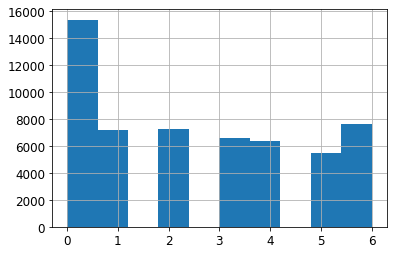

In [45]:
movies_final.NMF_topic.hist()

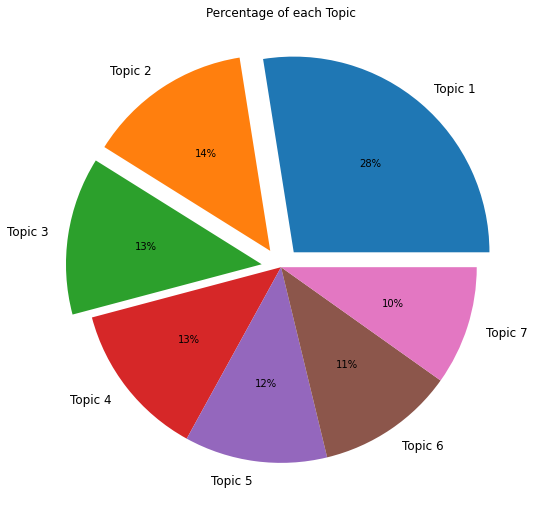

In [46]:
topics= movies_final["NMF_topic"].value_counts()[:].values.tolist()

explode= (0.1,0.1,0.1,0,0,0,0)
labels= movies_final["NMF_topic"].value_counts()[:].index.tolist()

plt.figure(figsize=(14,9))
plt.title("Percentage of each Topic")
plt.pie(topics, labels=("Topic 1","Topic 2","Topic 3","Topic 4","Topic 5","Topic 6","Topic 7"), explode=explode, autopct= "%1.f%%")
plt.show()

> Adding a description to each topic, and assigning it into a new column in dataframe

In [47]:
# dictionary:
topics_dictionary = {0: "Battle|Offence", 1: "Affairs|Mystery", 2:"Autobiography|Storytelling", 3:"Relationships|Marriage",
                     4:"School|College", 5:"War|Crime", 6: "Family|Relatives"}
movies_final["NMF_topic_description"] = movies_final["NMF_topic"].map(topics_dictionary)
movies_final.head()

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.2500,positive,0,Battle|Offence
1,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,When siblings Judy and Peter discover an encha...,"{'neg': 0.161, 'neu': 0.702, 'pos': 0.137, 'co...",-0.4588,negative,5,War|Crime
2,3,15602.0,Grumpier Old Men (1995),Comedy|Romance,A family wedding reignites the ancient feud be...,"{'neg': 0.168, 'neu': 0.791, 'pos': 0.041, 'co...",-0.7645,negative,6,Family|Relatives
3,4,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,"Cheated on, mistreated and stepped on, the wom...","{'neg': 0.06, 'neu': 0.673, 'pos': 0.267, 'com...",0.8860,positive,1,Affairs|Mystery
4,5,11862.0,Father of the Bride Part II (1995),Comedy,Just when George Banks has recovered from his ...,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.5023,positive,0,Battle|Offence


<Figure size 648x648 with 0 Axes>

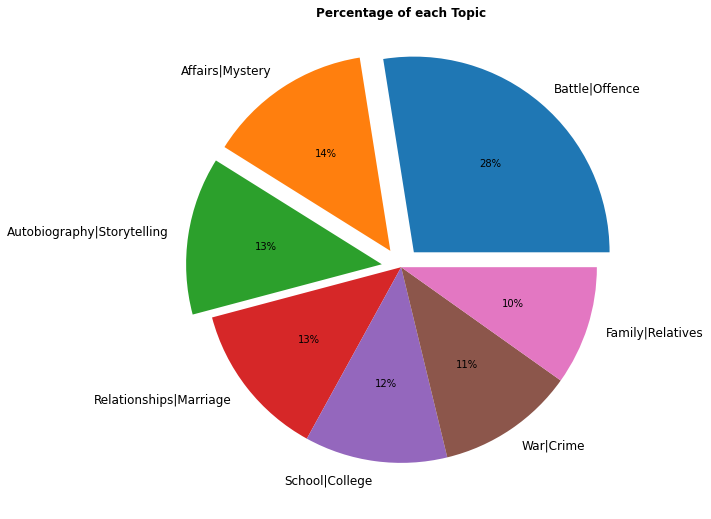

In [48]:
topics= movies_final["NMF_topic_description"].value_counts()[:].values.tolist()
plt.figure(figsize=(9,9))
explode= (0.1,0.1,0.1,0,0,0,0)
labels= movies_final["NMF_topic_description"].value_counts()[:].index.tolist()

plt.figure(figsize=(9,9))
plt.title("Percentage of each Topic", fontweight= "bold")
plt.pie(topics, labels=("Battle|Offence","Affairs|Mystery",
                        "Autobiography|Storytelling", "Relationships|Marriage",
                        "School|College", "War|Crime","Family|Relatives"), explode=explode, autopct= "%1.f%%")
plt.show()

# Name Entity Recognition (NER)

In [49]:
# all entity labels
# https://spacy.io/api/annotation#named-entities 

In [50]:
#1st movie overview
document= movies_final["overview"][0] 

document=nlp(document)
for entity in document.ents:
  print(f'{entity.text:{25}} {entity.label_:{25}} {str(spacy.explain(entity.label_))}')

Woody                     PERSON                    People, including fictional
Andy                      PERSON                    People, including fictional
Andy                      PERSON                    People, including fictional
Buzz Lightyear            PERSON                    People, including fictional
Andy                      PERSON                    People, including fictional
Woody                     PERSON                    People, including fictional
Buzz                      ORG                       Companies, agencies, institutions, etc.
Buzz                      ORG                       Companies, agencies, institutions, etc.
Woody                     PERSON                    People, including fictional


## NER Tags

> Total number of NER tags: `18`

Tags are accessible through the `.label_` property of an entity.
<table>
<tr><th>TYPE</th><th>DESCRIPTION</th><th>EXAMPLE</th></tr>
<tr><td>`PERSON`</td><td>People, including fictional.</td><td>*Fred Flintstone*</td></tr>
<tr><td>`NORP`</td><td>Nationalities or religious or political groups.</td><td>*The Republican Party*</td></tr>
<tr><td>`FAC`</td><td>Buildings, airports, highways, bridges, etc.</td><td>*Logan International Airport, The Golden Gate*</td></tr>
<tr><td>`ORG`</td><td>Companies, agencies, institutions, etc.</td><td>*Microsoft, FBI, MIT*</td></tr>
<tr><td>`GPE`</td><td>Countries, cities, states.</td><td>*France, UAR, Chicago, Idaho*</td></tr>
<tr><td>`LOC`</td><td>Non-GPE locations, mountain ranges, bodies of water.</td><td>*Europe, Nile River, Midwest*</td></tr>
<tr><td>`PRODUCT`</td><td>Objects, vehicles, foods, etc. (Not services.)</td><td>*Formula 1*</td></tr>
<tr><td>`EVENT`</td><td>Named hurricanes, battles, wars, sports events, etc.</td><td>*Olympic Games*</td></tr>
<tr><td>`WORK_OF_ART`</td><td>Titles of books, songs, etc.</td><td>*The Mona Lisa*</td></tr>
<tr><td>`LAW`</td><td>Named documents made into laws.</td><td>*Roe v. Wade*</td></tr>
<tr><td>`LANGUAGE`</td><td>Any named language.</td><td>*English*</td></tr>
<tr><td>`DATE`</td><td>Absolute or relative dates or periods.</td><td>*20 July 1969*</td></tr>
<tr><td>`TIME`</td><td>Times smaller than a day.</td><td>*Four hours*</td></tr>
<tr><td>`PERCENT`</td><td>Percentage, including "%".</td><td>*Eighty percent*</td></tr>
<tr><td>`MONEY`</td><td>Monetary values, including unit.</td><td>*Twenty Cents*</td></tr>
<tr><td>`QUANTITY`</td><td>Measurements, as of weight or distance.</td><td>*Several kilometers, 55kg*</td></tr>
<tr><td>`ORDINAL`</td><td>"first", "second", etc.</td><td>*9th, Ninth*</td></tr>
<tr><td>`CARDINAL`</td><td>Numerals that do not fall under another type.</td><td>*2, Two, Fifty-two*</td></tr>
</table>

In [51]:
# Displaying all entities. In comments because it requires time

'''
# setting a big nlp length in order to avoid crushes
nlp.max_length = 90000000 

# Convert series to string for entity exploration
movies_all_overviews= nlp(movies_final["overview"][:25000].to_string())

# Finding the entities, enity labels, and meaning of entities
for entity in movies_all_overviews.ents:
  print(f'{entity.text:{25}} {entity.label_:{25}} {str(spacy.explain(entity.label_))}')

'''

'\n# setting a big nlp length in order to avoid crushes\nnlp.max_length = 90000000 \n\n# Convert series to string for entity exploration\nmovies_all_overviews= nlp(movies_final["overview"][:25000].to_string())\n\n# Finding the entities, enity labels, and meaning of entities\nfor entity in movies_all_overviews.ents:\n  print(f\'{entity.text:{25}} {entity.label_:{25}} {str(spacy.explain(entity.label_))}\')\n\n'

In [52]:
# Displaying all entities. In comments because it requires time
'''

# setting a big nlp length in order to avoid crushes
nlp.max_length = 90000000 

# Convert series to string for entity exploration
movies_all_overviews= nlp(movies_final["overview"][25000:].to_string())

# Finding the entities, enity labels, and meaning of entities
for entity in movies_all_overviews.ents:
  print(f'{entity.text:{25}} {entity.label_:{25}} {str(spacy.explain(entity.label_))}')

'''

'\n\n# setting a big nlp length in order to avoid crushes\nnlp.max_length = 90000000 \n\n# Convert series to string for entity exploration\nmovies_all_overviews= nlp(movies_final["overview"][25000:].to_string())\n\n# Finding the entities, enity labels, and meaning of entities\nfor entity in movies_all_overviews.ents:\n  print(f\'{entity.text:{25}} {entity.label_:{25}} {str(spacy.explain(entity.label_))}\')\n\n'

## Visualization of Entities



### 1st movie overview

>> This is the 1st movie overview:

In [53]:
# Displaying the text as a script which is more readable (not like above)
from IPython.display import Markdown, display
display(Markdown('> '+movies_final["overview"][0]))

> Led by Woody, Andy's toys live happily in his room until Andy's birthday brings Buzz Lightyear onto the scene. Afraid of losing his place in Andy's heart, Woody plots against Buzz. But when circumstances separate Buzz and Woody from their owner, the duo eventually learns to put aside their differences.

>> And this is the same movie overview with its entities (displaying the movie overview in seperate sentences for a better visualisation)

In [54]:
document= movies_final["overview"][0]
document=nlp(document)

for sentence in document.sents:
    displacy.render(nlp(sentence.text), style='ent', jupyter=True)

In [55]:
for ent in nlp(movies_final["overview"][0]).ents:
  print(ent.label_)

PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
ORG
ORG
PERSON


In [56]:
# Visualising specific entities in separate sentences with different colour per entity
# https://www.w3schools.com/css/css3_gradients.asp

colors = {'ORG': 'linear-gradient(90deg, #aa9cfc, #fc9ce7)', 'PERSON': 'radial-gradient(yellow, green)'}

options = {'ents': ['ORG', 'PERSON'], "colors" : colors}

for sentence in document.sents:
    displacy.render(nlp(sentence.text), style='ent', jupyter=True, options=options)

### Visualisation - Frequency of entities, i.e. "`entity.label_`" 

In [57]:
# setting a large nlp length in order to avoid crushes
nlp.max_length = 90000000 

# Convert series to string for entity exploration
movies_all_overviews_1= nlp(movies_final["overview"][:25000].to_string()) # the first 25,000 overviews


# totally there are 18 entity categories availabe (NER tags)
# below: a fine-grained grouping-> to 13 categories
entity_persons=0
entity_time=0         # "Date" or "Cardinal" or "Time"
entity_locations=0    # "GPE" or "LOC"
entity_art=0
entity_product=0
entity_norp=0
entity_fac_org=0      # "FAC" or "ORG"
entity_events=0
entity_law=0
entity_language=0
entity_measurements=0 # "Percent" or "Ordinal" 
entity_money=0
entity_quantity=0

for entity in movies_all_overviews_1.ents:

  if entity.label_ == "PERSON":
    entity_persons=entity_persons+1

  elif entity.label_=="DATE" or entity.label_=="CARDINAL" or entity.label == "TIME":
    entity_time==entity_time+1

  elif entity.label_=="GPE" or entity.label_ == "LOC":
    entity_locations=entity_locations+1

  elif entity.label_=="WORK_OF_ART":
    entity_art=entity_art+1

  elif entity.label_=="PRODUCT":
    entity_product= entity_product+1

  elif entity.label_=="NORP":
    entity_norp=entity_norp+1

  elif entity.label_=="FAC" or entity.label_== "ORG":
    entity_fac_org=entity_fac_org+1
  
  elif entity.label_=="EVENT":
    entity_events=entity_events+1

  elif entity.label_=="LAW":
    entity_law=entity_law+1

  elif entity.label_=="LANGUAGE":
    entity_language=entity_language+1

  elif entity.label_=="PERCENT" or entity.label_== "ORDINAL":
    entity_measurements=entity_measurements+1

  elif entity.label_=="MONEY":
    entity_money=entity_money+1

  elif entity.label_=="QUANTITY":
    entity_quantity=entity_quantity+1


In [58]:
entity_persons

11691

In [59]:
entity_time

0

In [60]:
# setting a large nlp length in order to avoid crushes
nlp.max_length = 90000000 

# Convert series to string for entity exploration
movies_all_overviews_2= nlp(movies_final["overview"][25000:].to_string()) # the rest of movie overviews


for entity in movies_all_overviews_2.ents:

  if entity.label_ == "PERSON":
    entity_persons=entity_persons+1

  elif entity.label_=="DATE" or entity.label_=="CARDINAL" or entity.label == "TIME":
    entity_time==entity_time+1

  elif entity.label_=="GPE" or entity.label_ == "LOC":
    entity_locations=entity_locations+1

  elif entity.label_=="WORK_OF_ART":
    entity_art=entity_art+1

  elif entity.label_=="PRODUCT":
    entity_product= entity_product+1

  elif entity.label_=="NORP":
    entity_norp=entity_norp+1

  elif entity.label_=="FAC" or entity.label_== "ORG":
    entity_fac_org=entity_fac_org+1
  
  elif entity.label_=="EVENT":
    entity_events=entity_events+1

  elif entity.label_=="LAW":
    entity_law=entity_law+1

  elif entity.label_=="LANGUAGE":
    entity_language=entity_language+1

  elif entity.label_=="PERCENT" or entity.label_== "ORDINAL":
    entity_measurements=entity_measurements+1

  elif entity.label_=="MONEY":
    entity_money=entity_money+1

  elif entity.label_=="QUANTITY":
    entity_quantity=entity_quantity+1

In [61]:
entity_persons

25249

In [62]:
entity_time

0

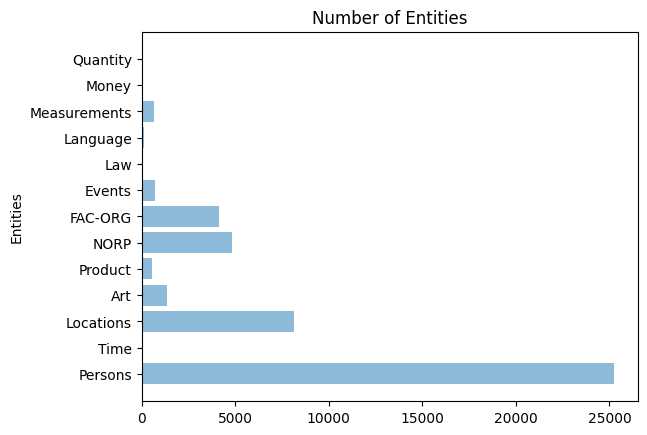

In [63]:
import matplotlib.pyplot as plt; plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = ('Persons', 'Time', 'Locations', 'Art', 'Product', 'NORP', "FAC-ORG", "Events", "Law", "Language", "Measurements", "Money", "Quantity")
y_pos = np.arange(len(objects))
performance = [entity_persons, entity_time, entity_locations, entity_art, entity_product, entity_norp, 
               entity_fac_org, entity_events, entity_law, entity_language, 
               entity_measurements, entity_money, entity_quantity]

plt.barh(y_pos, performance, align='center', alpha=0.5)
plt.yticks(y_pos, objects) 
plt.ylabel('Entities')
plt.title('Number of Entities')

plt.show()

In [64]:
'''
import matplotlib.pyplot as plt

all= len(movies_all_overviews_1.ents) + len(movies_all_overviews_2.ents)

others = all-entity_persons-entity_locations-entity_norp-entity_art-entity_product-entity_events-entity_fac_org-entity_events-entity_fac_org-entity_product

data = ((entity_persons/all*100),(entity_locations/all*100), (entity_norp/all*100), (entity_art/all*100),
                others/all*100)

explode= (0.04,0.04,0,0.19,0.1)

fig1, ax1 = plt.subplots(figsize=(9,6))

ax1.pie(data, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of NER Tags Allocation in Dataset", fontweight="bold", fontsize=10)
plt.show()
'''

'\nimport matplotlib.pyplot as plt\n\nall= len(movies_all_overviews_1.ents) + len(movies_all_overviews_2.ents)\n\nothers = all-entity_persons-entity_locations-entity_norp-entity_art-entity_product-entity_events-entity_fac_org-entity_events-entity_fac_org-entity_product\n\ndata = ((entity_persons/all*100),(entity_locations/all*100), (entity_norp/all*100), (entity_art/all*100),\n                others/all*100)\n\nexplode= (0.04,0.04,0,0.19,0.1)\n\nfig1, ax1 = plt.subplots(figsize=(9,6))\n\nax1.pie(data, explode=explode, labels=labels, autopct=\'%1.1f%%\',\n        shadow=True, startangle=90)\nax1.axis(\'equal\')  # Equal aspect ratio ensures that pie is drawn as a circle.\nplt.title("Percentage of NER Tags Allocation in Dataset", fontweight="bold", fontsize=10)\nplt.show()\n'

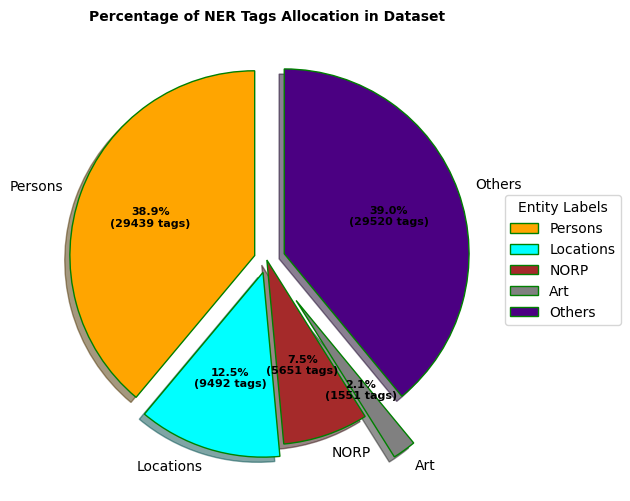

In [65]:
import matplotlib.pyplot as plt 
labels= ["Persons", "Locations", "NORP", "Art", "Others"]

#total number of entities
all= len(movies_all_overviews_1.ents) + len(movies_all_overviews_2.ents)

others = all-entity_persons-entity_locations-entity_norp-entity_art-entity_product-entity_events-entity_fac_org-entity_events-entity_fac_org-entity_product

data = ((entity_persons/all*100),(entity_locations/all*100), (entity_norp/all*100), (entity_art/all*100),
                others/all*100)

explode= (0.07,0.07,0,0.27,0.1)

colors = ( "orange", "cyan", "brown", 
          "grey", "indigo", "beige") 

# Wedge properties 
wp = { 'linewidth' : 1, 'edgecolor' : "green" }


# Creating autocpt arguments 
def func(pct, allvalues): 
    absolute = int(pct / 100.*np.sum(all)) 
    return "{:.1f}%\n({:d} tags)".format(pct, absolute) 


# Creating plot 
fig, ax = plt.subplots(figsize =(9, 6)) 
wedges, texts, autotexts = ax.pie(data,  
                                  autopct = lambda pct: func(pct, data), 
                                  explode = explode,  
                                  labels = labels, 
                                  shadow = True, 
                                  colors = colors, 
                                  startangle = 90, 
                                  wedgeprops = wp, 
                                  textprops = dict(color ="black")) 

# Adding legend 
ax.legend(wedges, labels, 
          title ="Entity Labels", 
          loc ="center left", 
          bbox_to_anchor =(1, 0, 0.5, 1)) 

plt.setp(autotexts, size = 8, weight ="bold") 
ax.set_title("Percentage of NER Tags Allocation in Dataset", fontweight="bold", fontsize=10)

plt.show() 


## Adding column "entities" to `movies_final` dataframe

In [66]:
movies_final.head()

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.2500,positive,0,Battle|Offence
1,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,When siblings Judy and Peter discover an encha...,"{'neg': 0.161, 'neu': 0.702, 'pos': 0.137, 'co...",-0.4588,negative,5,War|Crime
2,3,15602.0,Grumpier Old Men (1995),Comedy|Romance,A family wedding reignites the ancient feud be...,"{'neg': 0.168, 'neu': 0.791, 'pos': 0.041, 'co...",-0.7645,negative,6,Family|Relatives
3,4,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,"Cheated on, mistreated and stepped on, the wom...","{'neg': 0.06, 'neu': 0.673, 'pos': 0.267, 'com...",0.8860,positive,1,Affairs|Mystery
4,5,11862.0,Father of the Bride Part II (1995),Comedy,Just when George Banks has recovered from his ...,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.5023,positive,0,Battle|Offence


In [67]:
movies_final.loc[movies_final["movieId"] == 3].overview.values

array(["A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max."],
      dtype=object)

In [68]:
movies_final.loc[movies_final["movieId"] == 3].overview.values[0]

"A family wedding reignites the ancient feud between next-door neighbors and fishing buddies John and Max. Meanwhile, a sultry Italian divorcée opens a restaurant at the local bait shop, alarming the locals who worry she'll scare the fish away. But she's less interested in seafood than she is in cooking up a hot time with Max."

In [69]:
movies_final["entities"] = ""
for index in range(len(movies_final)):
  document = nlp(movies_final.loc[index,].overview)
  entities = []
  for entity in document.ents:
    entities.append(entity.label_)
  entities_str = '|'.join(entities)
  movies_final.loc[index,"entities"] = entities_str

In [70]:
movies_final.head()

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.2500,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON|PERSON|PERSON|ORG|...
1,2,8844.0,Jumanji (1995),Adventure|Children|Fantasy,When siblings Judy and Peter discover an encha...,"{'neg': 0.161, 'neu': 0.702, 'pos': 0.137, 'co...",-0.4588,negative,5,War|Crime,PERSON|PERSON|ORG|PERSON|DATE|PERSON|CARDINAL
2,3,15602.0,Grumpier Old Men (1995),Comedy|Romance,A family wedding reignites the ancient feud be...,"{'neg': 0.168, 'neu': 0.791, 'pos': 0.041, 'co...",-0.7645,negative,6,Family|Relatives,PERSON|PERSON|NORP|PERSON
3,4,31357.0,Waiting to Exhale (1995),Comedy|Drama|Romance,"Cheated on, mistreated and stepped on, the wom...","{'neg': 0.06, 'neu': 0.673, 'pos': 0.267, 'com...",0.8860,positive,1,Affairs|Mystery,PERSON|PERSON|PERSON|PERSON
4,5,11862.0,Father of the Bride Part II (1995),Comedy,Just when George Banks has recovered from his ...,"{'neg': 0.0, 'neu': 0.944, 'pos': 0.056, 'comp...",0.5023,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON


In [71]:
# making sure entities are correctly displayed

# grapping the entities of the 1st movie overview
document= nlp(movies_final["overview"][0])
for entity in document.ents:
  print(entity.label_)

PERSON
PERSON
PERSON
PERSON
PERSON
PERSON
ORG
ORG
PERSON


In [72]:
# compare the above with the first row of the new movies_final dataframe

movies_final.entities[0]
# it seems ok

'PERSON|PERSON|PERSON|PERSON|PERSON|PERSON|ORG|ORG|PERSON'

In [73]:
movies_final.head(1)

,movieId,tmdbId,title,genres,overview,Vader_score,Vader_compound,Vader_polarity,NMF_topic,NMF_topic_description,entities
0,1,862.0,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,"Led by Woody, Andy's toys live happily in his ...","{'neg': 0.048, 'neu': 0.886, 'pos': 0.066, 'co...",0.25,positive,0,Battle|Offence,PERSON|PERSON|PERSON|PERSON|PERSON|PERSON|ORG|...


# Extracting `"movies_final_2"` dataframe into a csv file

Calling the new dataframe `movies_final_2`

> Additionally to **movies_final** dataframe and csv file, it now also contains the following 6 features:
- Vader_score
- Vader_compound
- Vader_polarity
- NMF_topic
- NMF_topic_description
- entities

In [74]:
movies_final_2 = movies_final
movies_final_2.shape

(55877, 11)

In [75]:
movies_final_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55877 entries, 0 to 55876
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   movieId                55877 non-null  int64  
 1   tmdbId                 55877 non-null  float64
 2   title                  55877 non-null  object 
 3   genres                 55877 non-null  object 
 4   overview               55877 non-null  object 
 5   Vader_score            55877 non-null  object 
 6   Vader_compound         55877 non-null  float64
 7   Vader_polarity         55877 non-null  object 
 8   NMF_topic              55877 non-null  int64  
 9   NMF_topic_description  55877 non-null  object 
 10  entities               55877 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 4.7+ MB


In [76]:
# in comments to avoid re-creation of the file
'''
from google.colab import files

movies_final_2.to_csv('movies_final_2.csv', index=False)
files.download('movies_final_2.csv')
'''

"\nfrom google.colab import files\n\nmovies_final_2.to_csv('movies_final_2.csv', index=False)\nfiles.download('movies_final_2.csv')\n"